In [2]:
%matplotlib inline
import pylab as plt
from blimpy import Waterfall
import numpy as np
from scipy import interpolate
import peakutils
import rfi
import turbo_seti
import pandas as pd
import BaselineRemoval
from scipy.sparse import csc_matrix, eye, diags
from scipy.sparse.linalg import spsolve
import matplotlib
import scipy
import os

extracting integration 0...


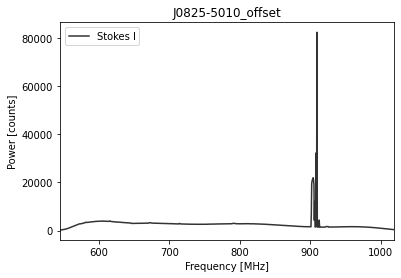

In [53]:
w=Waterfall('data/BR/guppi_59019_54324_002194_J0825-5010_offset_0001-ics.rawspec.0000.combined.fil')
w.plot_spectrum()

(-100.0, 2000.0)

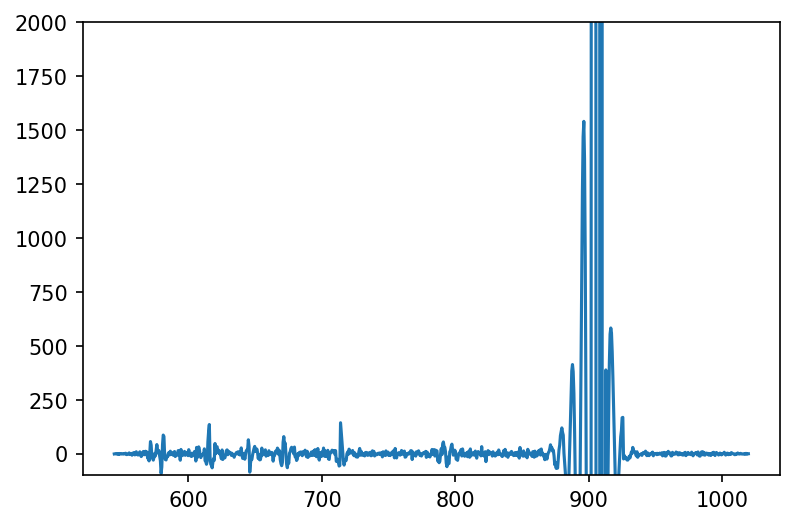

In [77]:
plt.figure(dpi=150)
f=w.get_power()[0][1:]
p=w.get_power()[1][1:]
# index=np.where((f>=910.0)&(f<=1650.0))
# f1=f[index]
# p1=p[index]
# rm=BaselineRemoval.BaselineRemoval(p).IModPoly()
# rm=np.where(rm<0,0,rm)
# base=peakutils.baseline(rm,deg=10)
# base=np.where(base<0,0,base)
base=rfi.splbase(f,p,spl_order=128)
# plt.plot(f,p,f,base,'--')
# plt.ylim(-100,5000)
plt.plot(f,p-base)
plt.ylim(-100,2000)

In [235]:
f=w.get_power()[0]
p=w.get_power()[1]
if w.container.f_start==856.0:
    index=np.where(f>=910)
    f=f[index]
    p=p[index]
if w.container.f_stop==1712.0:
    index=np.where(f<=1650)
    f=f[index]
    p=p[index]
if w.container.f_start==544.0:
    index=np.where(f>=650)
    f=f[index]
    p=p[index]
if w.container.f_stop>=980:
    index=np.where(f<=980)
    f=f[index]
    p=p[index]
p.mean()/p.std()

0.3990034

In [101]:
i=0
test=[]
while i<len(fi)-1:
    start=fi[i]
    if(fi[i+1]-start<=dist):
        end=fi[i+1]
        length=len(fi[i+1:])
        for j in range(length):
            if j==length-1:
                end=fi[i+1:][j]
                i+=j+1
                test.append([start,end])
                break
            else:
                if (abs(fi[i+1:][j]-end)<=dist):
                    end=fi[i+1:][j]
                else:
                    i+=j+1
                    if(j==0):
                        test.append([start,start])
                    else:
                        test.append([start,end])
                    break
    else:
        test.append([start,start])
        i+=1

(-100.0, 500.0)

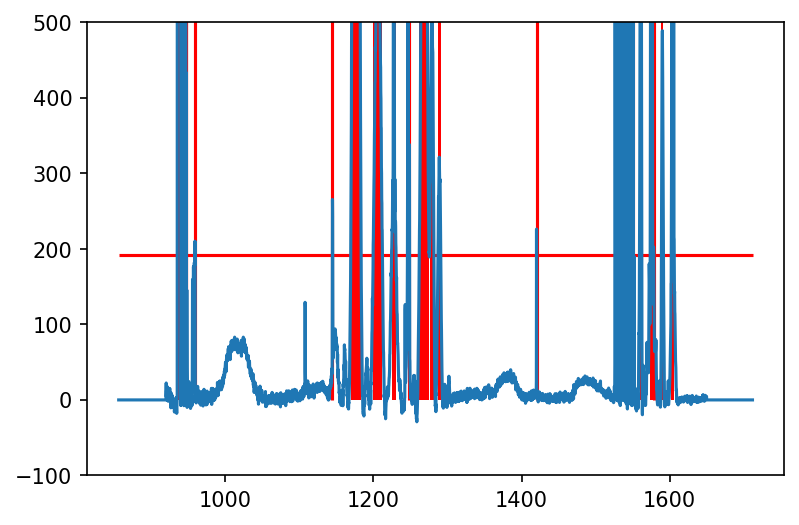

In [109]:
plt.figure(dpi=150)
plt.plot(f,rm)
plt.hlines(thres,w.container.f_start,w.container.f_stop,'r')
for i in test:
    if i[1]-i[0]>w.header['foff']:
        plt.bar((i[1]+i[0])/2,np.amax(rm),width=i[1]-i[0],color='r')
    else:
        plt.vlines(i[0],0,np.amax(rm),'r')
plt.ylim(-100,500)

(-10.0, 250.0)

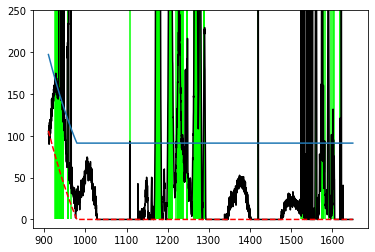

In [42]:
f,p,base=rfi.base(w)
test=rfi.rfi_range(w,multi=0.40)
plt.plot(f,p,'k',label='Power')
plt.plot(f,base,'r--',label='Baseline')
for i in test:
    if i[1]-i[0]>w.header['foff']:
        plt.bar((i[1]+i[0])/2,np.amax(p-base),width=i[1]-i[0],color='lime')
    else:
        plt.vlines(i[0],0,np.amax(p-base),'lime')
thres=(p-base).std()*0.04
plt.plot(f,base+thres)
plt.ylim(-10,250)